# 線形回帰で分離直線を求めるkoan

このNotebookは、tensorflowで、線形回帰を使って分離直線を求めるkoanです。
幾つかのセルは未実装の状態になっていて、assertEquals()のセルの実行に失敗するようになっています。

未実装のセルを適宜実装して、assertEquals()のセルがエラーにならないようにしてください。

In [7]:
from utils import assertEquals

In [8]:
import numpy as np

In [9]:
rs = np.random.RandomState(123)

In [10]:
x1 = rs.normal(0,  1.0,  (10, 2))

In [11]:
x1

array([[-1.0856306 ,  0.99734545],
       [ 0.2829785 , -1.50629471],
       [-0.57860025,  1.65143654],
       [-2.42667924, -0.42891263],
       [ 1.26593626, -0.8667404 ],
       [-0.67888615, -0.09470897],
       [ 1.49138963, -0.638902  ],
       [-0.44398196, -0.43435128],
       [ 2.20593008,  2.18678609],
       [ 1.0040539 ,  0.3861864 ]])

In [12]:
x2 = rs.normal(5,  1.0,  (10, 2))

In [9]:
x2

array([[ 5.73736858,  6.49073203],
       [ 4.06416613,  6.17582904],
       [ 3.74611933,  4.3622485 ],
       [ 5.9071052 ,  3.5713193 ],
       [ 4.85993128,  4.1382451 ],
       [ 4.74438063,  2.20141089],
       [ 3.2284669 ,  4.30012277],
       [ 5.92746243,  4.82636432],
       [ 5.00284592,  5.68822271],
       [ 4.12046366,  5.28362732]])

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt

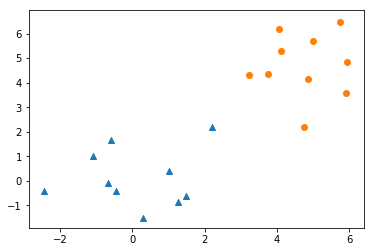

In [14]:
plt.scatter(x1[:, 0], x1[:, 1], marker='^')
plt.scatter(x2[:, 0], x2[:, 1], marker='o')
plt.show()

In [15]:
import tensorflow as tf

# この2つの群を分離する分離直線を学習する

ロスは$$ (-tanh(t*l) + 1)/2) $$ あたりが良いらしい。

## numpyによるデータ整形

まずはデータの準備をします。ここではnumpyで、後でtensorflowで学習する為のデータを作ります。
データ自体はすでにx1とx2という形で作ってありますが、これを以下で示すようなx_arr, y_arr, t_arrの3つに整形します。

- x_arr: xの値の配列（リストでも良い）。x1[:, 0]などを入れる。
- y_arr: yの値の配列。x1[:, 1]などを入れる。
- t_arr: 各点が群1と2のどちらに属すかを表す配列。あとの便宜上、群1なら-1,群2なら+1を入れる。


In [16]:
xy_arr = np.concatenate((x1, x2), axis=0)
x_arr = xy_arr[:, 0]
y_arr = xy_arr[:, 1]

### タスク1: 以下を実装してください

t_arrは、x1側の群の時には-1を、x2群の時には1を返すように初期化します。

ヒント: x1, x2のshapeとnp.onesを使う。

In [17]:
# TODO: implement here!
t_arr = np.concatenate((-np.ones(x1.shape[0]), np.ones(x2.shape[0])))

In [18]:
assertEquals(t_arr[0], -1)
assertEquals(t_arr[9], -1)

assertEquals(t_arr[10], 1)
assertEquals(t_arr[19], 1)

### Tensorflowのモデル定義とトレーニング

In [19]:
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
t = tf.placeholder(tf.float32)

In [20]:
a = tf.Variable([.9], dtype=tf.float32)
b = tf.Variable([-.3], dtype=tf.float32)

### タスク2: 点(x, y)の、直線 y= a*x + bからの距離を表すコンピューテーショングラフ lを求めよ。（距離はノーマライズされてなくて良いです）

In [22]:
# TODO: Implement here!

l = y - a*x -b

In [23]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    actual = sess.run(l, {x: [1.0], y: [2.0]})

In [24]:
assertEquals(actual[0], 1.40)

### タスク3: ロスの実装

このy=ax+bという直線で正しく分離されていたら低い値、間違って分離されていたら高い値になるように考えて、その和をlとおく。
ここは少し難しいので答えを見ても良い。

ヒント: l*tがだいたいそうなるように定義してきている。tanhあたりが良いらしい。和はtf.reduce_sum。

In [25]:
# TODO: Implement here!

loss = tf.reduce_sum((-tf.tanh(t*l) + 1)/2)

### タスク4: トレーニングのグラフを構築せよ

ヒント。Optimizerを使う。learning rateはいくつでも良いけど0.01とかで。

In [26]:
# TODO: implement here!

train_op = tf.train.GradientDescentOptimizer(0.01).minimize(loss)

In [27]:
all_losses = [] 
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(1000):
        res_loss, res_train, res_a, res_b = sess.run([loss, train_op, a, b], {x: x_arr, y: y_arr, t: t_arr})
        all_losses.append(res_loss)

In [28]:
assertEquals(res_a[0], -0.779)
assertEquals(res_b[0], 4.6)


### 結果のvisualize

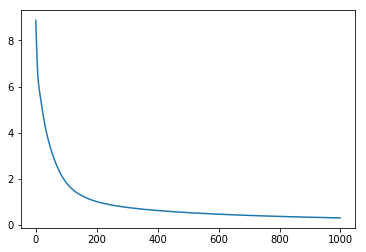

In [29]:
plt.plot(all_losses)
plt.show()

In [30]:
def fit(x):
    return res_a[0]*x+res_b[0]

In [31]:
xfit, yfit = (-2, 6), (fit(-2), fit(6))

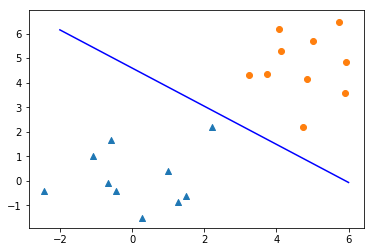

In [32]:
plt.scatter(x1[:, 0], x1[:, 1], marker='^')
plt.scatter(x2[:, 0], x2[:, 1], marker='o')
plt.plot(xfit, yfit,'b')
plt.show()